In [ ]:
path = '/content/drive/My Drive/ProjectB/'


In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Basic Preprocessing

In [ ]:
df = pd.read_csv(path+'flight.csv')

In [ ]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
df = df.dropna()
df = df.reset_index()
df.drop('index',axis=1,inplace=True)

# Feature Analysis

## Total Stops

In [ ]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [ ]:
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,},inplace=True)

## Additional Info

In [ ]:
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
df['Additional_Info'].replace({'No info':'No Info'},inplace=True)

In [ ]:
df['Additional_Info'].unique()

array(['No Info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No Info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No Info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No Info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No Info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No Info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No Info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No Info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No Info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No Info,12648


## Duration

In [ ]:
rows = df.shape[0]

In [ ]:
def make_dur(tm):
  ar = tm.split()
  if len(ar)==1:
    val1 = int(ar[0][:-1])
    val2 = 0
  else:
    val1 = int(ar[0][:-1])
    val2 = int(ar[1][:-1])
  
  return (val1*60)+val2 

In [ ]:
for i in range(rows):
  tm = df.iloc[i,7]
  # print(tm)
  df.iloc[i,7] = make_dur(tm)  


In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No Info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No Info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No Info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No Info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No Info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,0,No Info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,0,No Info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,180,0,No Info,7229
10680,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,160,0,No Info,12648


In [ ]:
import plotly.express as px

fig = px.scatter(df, x="Duration", y="Price", color="Airline",
                 hover_data=['Source','Destination','Date_of_Journey'])
fig.show()

## Source and Destination

In [ ]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
df['Destination'].unique()


array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [ ]:
df['Destination'].replace({'New Delhi':'Delhi'},inplace=True)

In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No Info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No Info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No Info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No Info,6218
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No Info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,0,No Info,4107
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,0,No Info,4145
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,180,0,No Info,7229
10680,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,160,0,No Info,12648


In [ ]:
df['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [ ]:
df['Journey'] = df['Source'] + ' ' + df['Destination']

In [ ]:
df['Journey'].unique()

array(['Banglore Delhi', 'Kolkata Banglore', 'Delhi Cochin',
       'Chennai Kolkata', 'Mumbai Hyderabad'], dtype=object)

In [ ]:
# stations = list(set(df['Destination']) | set(df['Source']))S

In [ ]:
# stations.sort()

In [ ]:
# stations

In [ ]:
# for i in range(len(stations)):
#   df['Destination'].replace({stations[i]:i},inplace=True)
#   df['Source'].replace({stations[i]:i},inplace=True)
  

In [ ]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey
0,IndiGo,24/03/2019,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,170,0,No Info,3897,Banglore Delhi
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2,No Info,7662,Kolkata Banglore
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2,No Info,13882,Delhi Cochin
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1,No Info,6218,Kolkata Banglore
4,IndiGo,01/03/2019,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,285,1,No Info,13302,Banglore Delhi
...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,150,0,No Info,4107,Kolkata Banglore
10678,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,155,0,No Info,4145,Kolkata Banglore
10679,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,180,0,No Info,7229,Banglore Delhi
10680,Vistara,01/03/2019,Banglore,Delhi,BLR → DEL,11:30,14:10,160,0,No Info,12648,Banglore Delhi


## Arrival Time and Departure Time

In [ ]:
def arrival_time(tm):
  use = tm.split()
  tt = use[0]
  ar = tt.split(':')
  hrs = int(ar[0])
  min = int(ar[1])
  
  return hrs,min


In [ ]:
df['Arrival_hour'] = None
df['Arrival_min'] = None
for i in range(rows):
  atm = df.at[i,'Arrival_Time']
  # print(tm)
  h,m = arrival_time(atm)
  # h,m = arrival_time(atm)
  df.at[i,'Arrival_hour'] = h
  df.at[i,'Arrival_min'] = m 


In [ ]:
def dep_time(tm):
  # use = tm.split()
  # tt = use[0]
  ar = tm.split(':')
  hrs = int(ar[0])
  min = int(ar[1])
  
  return hrs,min


In [ ]:
df['Dep_hour'] = None
df['Dep_min'] = None
for i in range(rows):
  atm = df.at[i,'Dep_Time']
  # print(tm)
  h,m = dep_time(atm)
  # h,m = arrival_time(atm)
  df.at[i,'Dep_hour'] = h
  df.at[i,'Dep_min'] = m 


In [ ]:
df.drop('Dep_Time',axis=1,inplace=True)
df.drop('Arrival_Time',axis=1,inplace=True)

## Date

In [ ]:
#For date we have assumed all them to be of same year so we can remove that term what we plan to do is make it corresponding date of that year

In [ ]:
def transform_date(dt):
  ar = dt.split('/')
  date = int(ar[0])
  month = int(ar[1])
  year = int(ar[2])
  return date,month,year

In [ ]:
import datetime
import calendar
def findDay(date):
	born = datetime.datetime.strptime(date, '%d/%m/%Y').weekday()
	return (calendar.day_name[born])
# date = '03/02/2019'
# print(findDay(date))

In [ ]:
date_dict = {'date':[],'month':[],'year':[],'day':[]}

for i in range(rows):
  dt = df.iloc[i,1]
  D,M,Y = transform_date(dt)
  date_dict['date'].append(D)
  date_dict['month'].append(M)
  date_dict['year'].append(Y)
  date_dict['day'].append(findDay(dt))
  # print(tm)
  # df.iloc[i,6] = arrival_time(atm)  


In [ ]:
len(date_dict['date'])

10682

In [ ]:
rows

10682

In [ ]:
date_df = pd.DataFrame(date_dict)

In [ ]:
len(date_df['year'].unique())

1

In [ ]:
#We can drop Year column as it is of no use in this datafram

In [ ]:
date_df.drop('year',axis=1,inplace=True)

In [ ]:
date_df

,date,month,day
0,24,3,Sunday
1,1,5,Wednesday
2,9,6,Sunday
3,12,5,Sunday
4,1,3,Friday
...,...,...,...
10677,9,4,Tuesday
10678,27,4,Saturday
10679,27,4,Saturday
10680,1,3,Friday


In [ ]:
df = pd.concat([date_df,df],axis='columns')

In [ ]:
df.drop('Date_of_Journey',axis=1,inplace=True)

In [ ]:
df

,date,month,day,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,24,3,Sunday,IndiGo,Banglore,Delhi,BLR → DEL,170,0,No Info,3897,Banglore Delhi,1,10,22,20
1,1,5,Wednesday,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No Info,7662,Kolkata Banglore,13,15,5,50
2,9,6,Sunday,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No Info,13882,Delhi Cochin,4,25,9,25
3,12,5,Sunday,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No Info,6218,Kolkata Banglore,23,30,18,5
4,1,3,Friday,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1,No Info,13302,Banglore Delhi,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,9,4,Tuesday,Air Asia,Kolkata,Banglore,CCU → BLR,150,0,No Info,4107,Kolkata Banglore,22,25,19,55
10678,27,4,Saturday,Air India,Kolkata,Banglore,CCU → BLR,155,0,No Info,4145,Kolkata Banglore,23,20,20,45
10679,27,4,Saturday,Jet Airways,Banglore,Delhi,BLR → DEL,180,0,No Info,7229,Banglore Delhi,11,20,8,20
10680,1,3,Friday,Vistara,Banglore,Delhi,BLR → DEL,160,0,No Info,12648,Banglore Delhi,14,10,11,30


## Route

In [ ]:
df['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [ ]:
route_list = []
for i in range(df.shape[0]) : 
  h = df.at[i,'Route'].split(' → ')
  for j in h :  
    if j not in route_list: 
      route_list.append(j)

print(route_list)


['BLR', 'DEL', 'CCU', 'IXR', 'BBI', 'LKO', 'BOM', 'COK', 'NAG', 'MAA', 'AMD', 'PNQ', 'IDR', 'GAU', 'HYD', 'BHO', 'JAI', 'ATQ', 'JDH', 'GOI', 'BDQ', 'TRV', 'IXU', 'IXB', 'UDR', 'RPR', 'DED', 'VGA', 'VNS', 'ISK', 'IXC', 'PAT', 'JLR', 'KNU', 'GWL', 'VTZ', 'NDC', 'HBX', 'IXZ', 'IMF', 'IXA', 'STV']


In [ ]:
df['Route_New'] = None
for i in range(df.shape[0]):
  h = df.at[i,'Route'].split(' → ')
  df.at[i,'Route_New'] = h

In [ ]:
df

,date,month,day,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey,Arrival_hour,Arrival_min,Dep_hour,Dep_min,Route_New
0,24,3,Sunday,IndiGo,Banglore,Delhi,BLR → DEL,170,0,No Info,3897,Banglore Delhi,1,10,22,20,"[BLR, DEL]"
1,1,5,Wednesday,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No Info,7662,Kolkata Banglore,13,15,5,50,"[CCU, IXR, BBI, BLR]"
2,9,6,Sunday,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No Info,13882,Delhi Cochin,4,25,9,25,"[DEL, LKO, BOM, COK]"
3,12,5,Sunday,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No Info,6218,Kolkata Banglore,23,30,18,5,"[CCU, NAG, BLR]"
4,1,3,Friday,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1,No Info,13302,Banglore Delhi,21,35,16,50,"[BLR, NAG, DEL]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,9,4,Tuesday,Air Asia,Kolkata,Banglore,CCU → BLR,150,0,No Info,4107,Kolkata Banglore,22,25,19,55,"[CCU, BLR]"
10678,27,4,Saturday,Air India,Kolkata,Banglore,CCU → BLR,155,0,No Info,4145,Kolkata Banglore,23,20,20,45,"[CCU, BLR]"
10679,27,4,Saturday,Jet Airways,Banglore,Delhi,BLR → DEL,180,0,No Info,7229,Banglore Delhi,11,20,8,20,"[BLR, DEL]"
10680,1,3,Friday,Vistara,Banglore,Delhi,BLR → DEL,160,0,No Info,12648,Banglore Delhi,14,10,11,30,"[BLR, DEL]"


In [ ]:
for j in route_list:
  df[j] = 0

In [ ]:
df.iloc[:,-42:]

,BLR,DEL,CCU,IXR,BBI,LKO,BOM,COK,NAG,MAA,...,JLR,KNU,GWL,VTZ,NDC,HBX,IXZ,IMF,IXA,STV
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10678,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10679,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10680,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in range(df.shape[0]):
  h = df.at[i,'Route_New']
  h = h[1:-1]
  for j in h:
    df.at[i,j] = 1

In [ ]:
# df.drop('Route',axis=1,inplace=True)
df.drop('Route_New',axis=1,inplace=True)

In [ ]:
df

,date,month,day,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,...,JLR,KNU,GWL,VTZ,NDC,HBX,IXZ,IMF,IXA,STV
0,24,3,Sunday,IndiGo,Banglore,Delhi,BLR → DEL,170,0,No Info,...,0,0,0,0,0,0,0,0,0,0
1,1,5,Wednesday,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No Info,...,0,0,0,0,0,0,0,0,0,0
2,9,6,Sunday,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No Info,...,0,0,0,0,0,0,0,0,0,0
3,12,5,Sunday,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No Info,...,0,0,0,0,0,0,0,0,0,0
4,1,3,Friday,IndiGo,Banglore,Delhi,BLR → NAG → DEL,285,1,No Info,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,9,4,Tuesday,Air Asia,Kolkata,Banglore,CCU → BLR,150,0,No Info,...,0,0,0,0,0,0,0,0,0,0
10678,27,4,Saturday,Air India,Kolkata,Banglore,CCU → BLR,155,0,No Info,...,0,0,0,0,0,0,0,0,0,0
10679,27,4,Saturday,Jet Airways,Banglore,Delhi,BLR → DEL,180,0,No Info,...,0,0,0,0,0,0,0,0,0,0
10680,1,3,Friday,Vistara,Banglore,Delhi,BLR → DEL,160,0,No Info,...,0,0,0,0,0,0,0,0,0,0


# Visualization

In [ ]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Price')

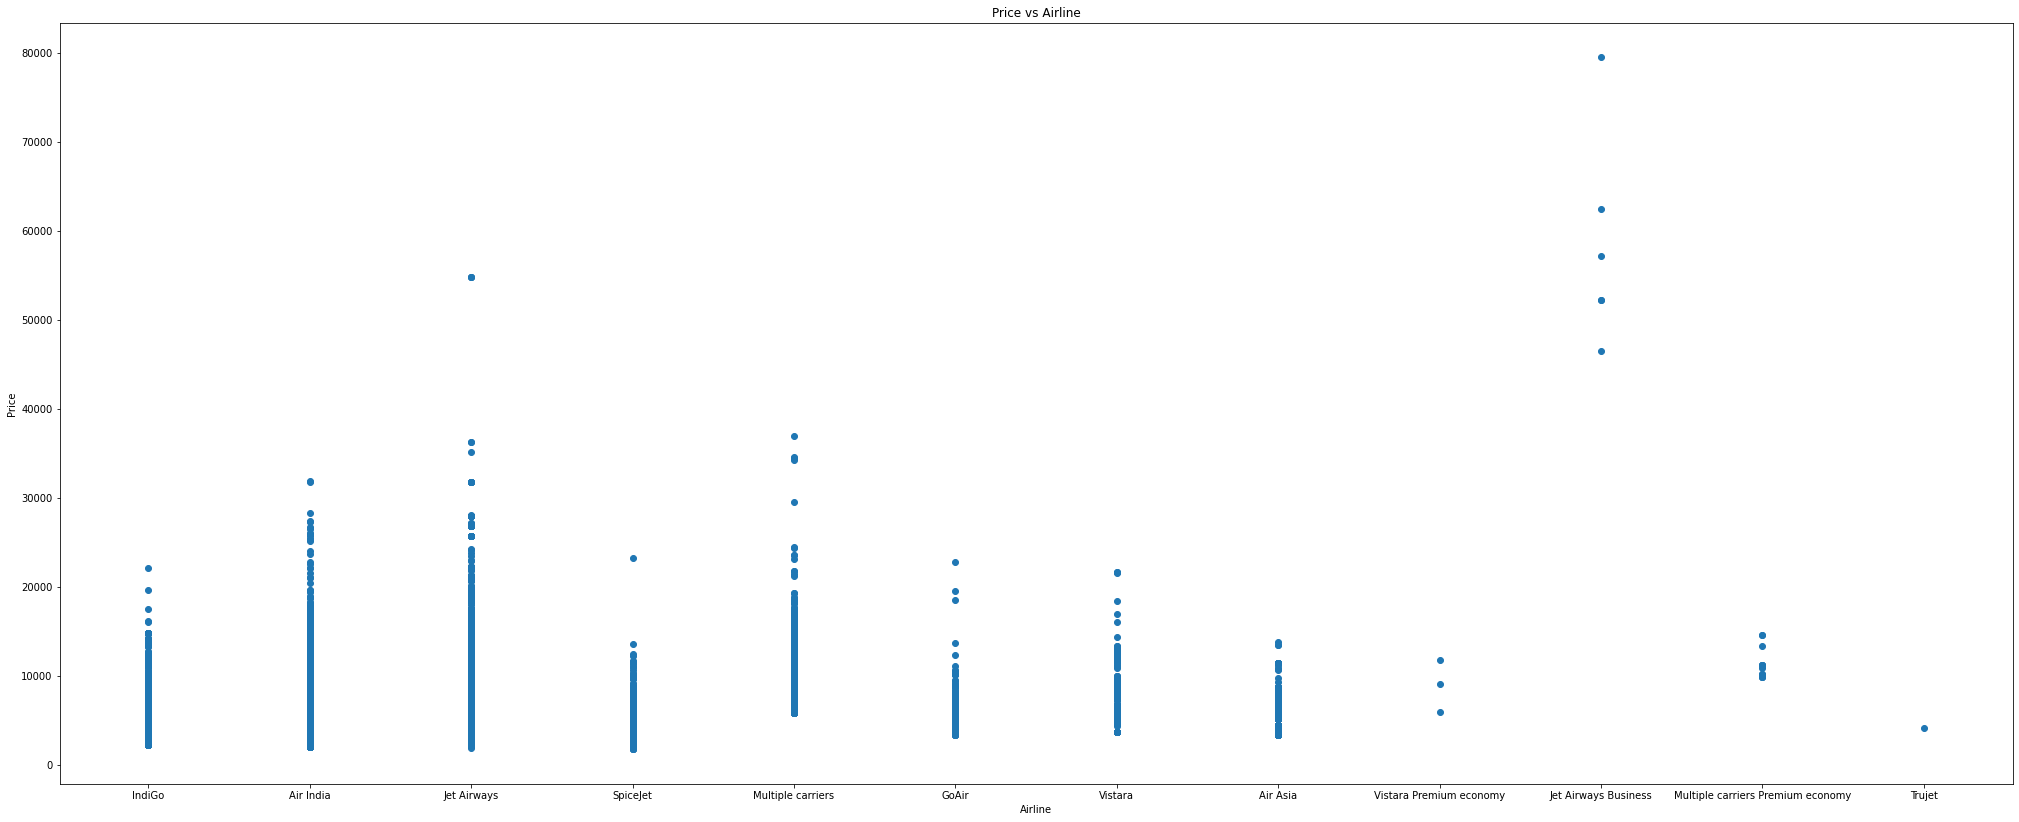

In [ ]:
plt.figure(figsize = (35, 14))
plt.title('Price vs Airline')
plt.scatter(df['Airline'], df['Price'])
plt.xlabel('Airline')
plt.ylabel('Price')

In [ ]:
import plotly.express as px


In [ ]:
fig = px.bar(df, x="Source", y="Duration", color="Airline", title="Long-Form Input")
fig.show()

In [ ]:
fig = px.bar(df, x="Destination", y="Duration", color="Airline", title="Long-Form Input")
fig.show()

In [ ]:
fig = px.bar(df, x="Source", y="Dep_hour", color="Airline", title="Long-Form Input")
fig.show()

In [ ]:
fig = px.bar(df, x="Destination", y="Arrival_hour", color="Airline", title="Long-Form Input")
fig.show()

# Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['day'] = lb.fit_transform(df['day'])
df['Airline'] = lb.fit_transform(df['Airline'])
df['Additional_Info'] = lb.fit_transform(df['Additional_Info'])
df['month'] = lb.fit_transform(df['month'])
df['Source'] = lb.fit_transform(df['Source'])
df['Destination'] = lb.fit_transform(df['Destination'])
df['Journey'] = lb.fit_transform(df['Journey'])
df['Route'] = lb.fit_transform(df['Route'])

In [ ]:
df = df.astype('int64')

In [ ]:
df

,date,month,day,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,...,JLR,KNU,GWL,VTZ,NDC,HBX,IXZ,IMF,IXA,STV
0,24,0,3,3,0,2,18,170,0,6,...,0,0,0,0,0,0,0,0,0,0
1,1,2,6,1,3,0,84,445,2,6,...,0,0,0,0,0,0,0,0,0,0
2,9,3,3,4,2,1,118,1140,2,6,...,0,0,0,0,0,0,0,0,0,0
3,12,2,3,3,3,0,91,325,1,6,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,0,2,29,285,1,6,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,9,1,5,0,3,0,64,150,0,6,...,0,0,0,0,0,0,0,0,0,0
10678,27,1,2,1,3,0,64,155,0,6,...,0,0,0,0,0,0,0,0,0,0
10679,27,1,2,4,0,2,18,180,0,6,...,0,0,0,0,0,0,0,0,0,0
10680,1,0,0,10,0,2,18,160,0,6,...,0,0,0,0,0,0,0,0,0,0


#Splitting

In [ ]:
from sklearn.model_selection  import train_test_split


In [ ]:
X = df.drop('Price',axis=1)
Y = df.loc[:,'Price']

In [ ]:
# X = X.drop('day',axis=1)
# X = X.drop('Destination',axis=1)

In [ ]:
X2 = X.iloc[:,:11]

In [ ]:
X2

,date,month,day,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Journey
0,24,0,3,3,0,2,18,170,0,6,0
1,1,2,6,1,3,0,84,445,2,6,3
2,9,3,3,4,2,1,118,1140,2,6,2
3,12,2,3,3,3,0,91,325,1,6,3
4,1,0,0,3,0,2,29,285,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...
10677,9,1,5,0,3,0,64,150,0,6,3
10678,27,1,2,1,3,0,64,155,0,6,3
10679,27,1,2,4,0,2,18,180,0,6,0
10680,1,0,0,10,0,2,18,160,0,6,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=69)

#Models

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse

## LGBM Regressor

In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
lgb = LGBMRegressor()
params = {'num_iterations':np.arange(100,2100,100),'num_leaves':np.arange(25,50)}
model1 = RandomizedSearchCV(lgb, params,scoring='r2')
# y_pred1 = model1.predict(X_test)
# r2 = r2_score(y_test, y_pred1)
src = model1.fit(X_train,y_train)
p1 = src.best_params_['num_iterations']
p2 = src.best_params_['num_leaves']
# print(r2)
lgb2 = LGBMRegressor(num_iterations=p1,num_leaves=p2)
lgb2.fit(X_train,y_train)
y_pred11 = lgb2.predict(X_test)
r2a = r2_score(y_test, y_pred11)
mse1 = mse(y_test, y_pred11)
print('R2 Score',r2a)
print('Mean Squared Error',mse1)

R2 Score 0.9273486535245246
Mean Squared Error 1382394.411261355


In [ ]:
lgb = LGBMRegressor(num_iterations=700,num_leaves=22)
lgb.fit(X_train,y_train)
y_pred1 = lgb.predict(X_test)
r2 = r2_score(y_test, y_pred1)
mse11 = mse(y_test, y_pred1)
# print(r2)
print('R2 Score',r2)
print('Mean Squared Error',mse11)

R2 Score 0.9297890383578685
Mean Squared Error 1335959.2862622538


## XGB Regressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgb = XGBRegressor()
params2 = {'num_iterations':np.arange(100,2100,100),'max_depth':np.arange(1,20)}
model1 = RandomizedSearchCV(xgb, params2,scoring='r2')
# y_pred1 = model1.predict(X_test)
# r2 = r2_score(y_test, y_pred1)
src = model1.fit(X_train,y_train)
# src.best_params_
p1 = src.best_params_['num_iterations']
p2 = src.best_params_['max_depth']
# print(r2)
xgb2 = XGBRegressor(num_iterations=p1,max_depth=p2)
xgb2.fit(X_train,y_train)
y_pred21 = xgb2.predict(X_test)
r2b = r2_score(y_test, y_pred21)
mse2 = mse(y_test, y_pred21)
# print(r2b)
print('R2 Score',r2b)
print('Mean Squared Error',mse2)

[17:17:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:47] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:17:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:18:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [ ]:
print(p1,p2)

800 11


In [ ]:
xgb = XGBRegressor(num_iterations=1900,max_Depth=12)
# xgb = XGBRegressor()
xgb.fit(X_train,y_train)
y_pred2 = xgb.predict(X_test)
r2_n = r2_score(y_test, y_pred2)
mse_n = mse(y_test, y_pred2)
print('R2 Score',r2_n)
print('Mean Squared Error',mse_n)
# print(r2_n)

[17:08:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score 0.8463582586651449
Mean Squared Error 2923462.46644531


## FlamL

In [ ]:
pip install flaml

In [ ]:
from flaml import AutoML

In [ ]:
automl= AutoML(metric="r2",task="regression",time_budget=200)

In [ ]:
automl.fit(X_train,y_train)

[flaml.automl: 05-01 17:02:26] {2105} INFO - task = regression
[flaml.automl: 05-01 17:02:26] {2107} INFO - Data split method: uniform
[flaml.automl: 05-01 17:02:26] {2111} INFO - Evaluation method: cv
[flaml.automl: 05-01 17:02:26] {2188} INFO - Minimizing error metric: 1-r2
[flaml.automl: 05-01 17:02:26] {2281} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth']
[flaml.automl: 05-01 17:02:26] {2567} INFO - iteration 0, current learner lgbm
[flaml.automl: 05-01 17:02:26] {2698} INFO - Estimated sufficient time budget=1870s. Estimated necessary time budget=13s.
[flaml.automl: 05-01 17:02:26] {2750} INFO -  at 0.4s,	estimator lgbm's best error=0.7189,	best estimator lgbm's best error=0.7189
[flaml.automl: 05-01 17:02:26] {2567} INFO - iteration 1, current learner lgbm
[flaml.automl: 05-01 17:02:27] {2750} INFO -  at 0.6s,	estimator lgbm's best error=0.7189,	best estimator lgbm's best error=0.7189
[flaml.automl: 05-01 17:02:27] {2567} INFO 

In [ ]:
print(automl.model.estimator)

ExtraTreesRegressor(max_features=0.7374784660318752, max_leaf_nodes=1993,
                    n_estimators=60, n_jobs=-1)


In [ ]:
pred3= automl.predict(X_test)
automl_r2=r2_score(y_test,pred3)
mse4=mse(y_test,pred3)
# print(automl_r2)
print('R2 Score',automl_r2)
print('Mean Squared Error',mse4)

R2 Score 0.9282272667007943
Mean Squared Error 1365676.346098641


## SVM

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR(C = 100)

In [ ]:
svr.fit(X_train,y_train)
pred_sv = svr.predict(X_test)
r2_svr = r2_score(y_test,pred_sv)
mse5 = mse(y_test,pred_sv)
# print(r2_svr)
print('R2 Score',r2_svr)
print('Mean Squared Error',mse5)

R2 Score 0.42334227654397605
Mean Squared Error 10972520.851838568


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
# xgb = XGBRegressor()
params3 = {'random_state':np.arange(0,101,1),'max_depth':np.arange(1,30)}
model1 = RandomizedSearchCV(clf, params3,scoring='r2')
# y_pred1 = model1.predict(X_test)
# r2 = r2_score(y_test, y_pred1)
src = model1.fit(X_train,y_train)
# src.best_params_
p1 = src.best_params_['random_state']
p2 = src.best_params_['max_depth']
# print(r2)
clf2 = RandomForestRegressor(random_state=p1,max_depth=p2)
clf2.fit(X_train,y_train)
y_pred_rf1 = clf2.predict(X_test)
r2_cl = r2_score(y_test, y_pred_rf1)
mse6 = mse(y_test, y_pred_rf1)
# print(r2_cl)\
print('R2 Score',r2_cl)
print('Mean Squared Error',mse6)

R2 Score 0.9280543645596994
Mean Squared Error 1368966.2913665571


In [ ]:
print(p1,p2)

66 18


## Models vs r2

In [ ]:
models_set = {'LGBM':[r2,mse11],'XGB':[r2b,mse2],'Random Forest':[r2_cl,mse4],'AutoML':[automl_r2,mse5],'SVM':[r2_svr,mse6]}

In [ ]:
print('Model\t\tr2_score\t\t\tMSE')
for i in models_set.keys():
  if (i=='Random Forest'):
    print(i,'\t',models_set[i][0],'\t\t',models_set[i][1])
  else:
    print(i,'\t\t',models_set[i][0],'\t\t',models_set[i][1])

Model		r2_score			MSE
LGBM 		 0.9297890383578685 		 1335959.2862622538
XGB 		 0.9295875357793261 		 1339793.4345877199
Random Forest 	 0.9280543645596994 		 1365676.346098641
AutoML 		 0.9282272667007943 		 10972520.851838568
SVM 		 0.42334227654397605 		 1368966.2913665571
